## Utility Maximization


A consumer maximizes Cobb-Douglas utility 

$$U(c_1,c_2) = c_1^\alpha c_2^{(1-\alpha)}$$

subject to the budget constraint

$$p_1 c_1 + p_2 c_2 \leq I $$

To plot the budget constraint we rearrange to solve for:

$$c_2 = \frac{I}{p_2} - \frac{p_1}{p_2} c_1$$

To draw the indifference curve associated with a given utility level $\bar u$ we solve for:

$$c_2 = \left( \frac{\bar u}{c_1^\alpha}\right)^\frac{1}{1 - \alpha}$$

It is easy to show that for Cobb-Douglas utility the marginal rate of substitution between $c_2$ and $c_1$ is:

$$MRS = \frac{U_1}{U_2} = \frac{\alpha}{1-\alpha} \frac{c_2}{c_1}$$

where $U_1 =\frac{\partial U}{\partial c_1}$ and $U_2 =\frac{\partial U}{\partial c_2}$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [2]:
def U(c1, c2, alpha):
    return (c1**alpha)*(c2**(1-alpha))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def indif(c1, ubar, alpha):
    return (ubar/(c1**alpha))**(1/(1-alpha))

## The consumer's optimum

$$L(c_1,c_2) = U(c_1,c_2) + \lambda (I - p_1 c_1  - p_2 c_2) $$




Differentiate with respect to $c_1$ and $c_2$ and $\lambda$ to get:

$$ U_1 = \lambda{p_1}$$

$$ U_2 = \lambda{p_2}$$

$$ I = p_1 c_1  + p_2 c_2$$

Dividing the first equation by the second we get the familiar necessary tangency condition for an interior optimum:

$$MRS = \frac{U_1}{U_2} =\frac{p_1}{p_2}$$

Using our earlier expression for the MRS of a Cobb-Douglas indifference curve, substituting this into the budget constraint and rearranging then allows us to solve for the Marshallian demands:

$$c_1(p_1,p_2,I)=\alpha \frac{I}{p_1}$$

$$c_1(p_1,p_2,I)=(1-\alpha) \frac{I}{p_2}$$

In [3]:
def find_opt(p1,p2,I,alpha):
    c1 = alpha * I/p1
    c2 = (1-alpha)*I/p2
    u = U(c1,c2,alpha)
    return c1, c2, u

## Interactive indifference curve diagram

In [4]:
alpha = 0.5
p1, p2 = 1, 1
I = 100

pmin, pmax = 1, 4
Imin, Imax = 10, 200
cmax = (3/4)*Imax/pmin

In [7]:
def consume_plot(p1=p1, p2=p2, I=I, alpha=alpha):
    
    c1 = np.linspace(0.1,cmax,num=100)
    c1e, c2e, uebar = find_opt(p1, p2 ,I, alpha)
    idfc = indif(c1, uebar, alpha)
    budg = budgetc(c1, p1, p2, I)
    
    fig, ax = plt.subplots(figsize=(8,8))
    ax.plot(c1, budg, lw=2.5)
    ax.plot(c1, idfc, lw=2.5)
    ax.vlines(c1e,0,c2e, linestyles="dashed")
    ax.hlines(c2e,0,c1e, linestyles="dashed")
    ax.plot(c1e,c2e,'ob')
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel('$c_2$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid()
    plt.show()

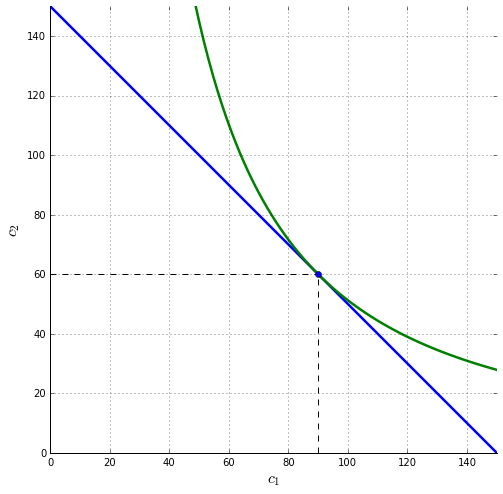

In [8]:
interact(consume_plot,p1=(pmin,pmax,0.1),p2=(pmin,pmax,0.1), I=(Imin,Imax,10),alpha=(0.05,0.95,0.05))